Four datasets have been simulated with ticks :

- with or without a constant baseline
- exponential or power law kernel

Values of the parameters :
- baseline : mu_0 = 5 , mu_1 = 50 , delta = 0.8
- exponential kernel : beta_0 = 80 , beta_1 = 100
- power law kernel : alpha = 0.6, c = 0.5, beta_1 = 1.5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [ ]:
timestamps_exp_cst =[]
with open("timestamps_exp_cst.csv", "r", newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        timestamps_exp_cst.append(np.array(row, dtype=np.float64))

In [ ]:
timestamps_exp_cst

In [ ]:
timestamps_exp_cst[0][0]

In [ ]:
timestamps_exp =[]
with open("timestamps_exp.csv", "r", newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        timestamps_exp.append(np.array(row, dtype=np.float64))

In [ ]:
len(timestamps_exp)

In [ ]:
timestamps_pow =[]
with open("timestamps_pow.csv", "r", newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        timestamps_pow.append(np.array(row, dtype=np.float64))

In [ ]:
timestamps_pow_cst =[]
with open("timestamps_pow_cst.csv", "r", newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        timestamps_pow_cst.append(np.array(row, dtype=np.float64))

Paramhawkes library computes the log likelihood of a dataset, the MLE and AIC/BIC information criteria values.

In [2]:
import paramhawkes as ph

With exponential kernel and non constant baseline

In [ ]:
test = ph.HawkesProcess(timestamps_exp)

In [ ]:
test.set_kernel_shape()

In [3]:
params=np.array([10 , 40 , 0.6 , 10])

Compute the opposite of the loglikelihood for a given value of parameters

In [ ]:
test.loglikelihood(params, delta=0.7)

In [ ]:
test.ll

With exponential kernel and constant baseline

In [ ]:
test_c = ph.HawkesProcess(timestamps_exp_cst)

In [ ]:
test_c.set_kernel_shape()

In [ ]:
test_c.loglikelihood(params,delta=1)

In [ ]:
test_c.ll

MLE (exponential kernel) with non constant baseline (delta = 0.8)

In [4]:
test.compute_mle(params,delta0 = 0.8)

NameError: name 'test' is not defined

In [ ]:
print(test.resoptim)

In [ ]:
test.resoptim.hess_inv.todense()

MLE (exponential kernel) with constant baseline

In [ ]:
test_c.compute_mle(params,delta0 =1)

In [ ]:
test_c.resoptim

In [ ]:
test_c.aic_value

In [ ]:
test_c.bic_value

In [ ]:
test.aic_value

In [ ]:
test.bic_value

Likelihood ratio test for change-point detection. In this case, the likelihood ratio is written with respect to the measure defined by a Hawkes process with constant baseline.

(with true values of parameters)

In [ ]:
test.llratio(np.array([5,50,80,100]),delta=0.8)

In [ ]:
test.lr

with constant baseline data

In [ ]:
test_c.llratio(np.array([5,50,80,100]),delta=0.8)

In [ ]:
test_c.lr

Study of the flatness / convexity of the opposite of the loglikelihood around its minimum

In [ ]:
x , y = np.meshgrid(np.linspace(60,100,21),np.linspace(80,120,21))

In [ ]:
def llpart(x,y):
    test.loglikelihood(np.array([5,50,x,y]), delta=0.8)
    return test.ll

In [ ]:
llpart(80,100)

In [ ]:
llpart = np.vectorize(llpart)

In [ ]:
z=llpart(x,y)

In [ ]:
graphe = plt.contourf(x,y,z,20)
plt.colorbar()
plt.title('Value of the opposite of the loglikelihood (depending on the kernel parameters)')
plt.show()

Grid to perform the MLE computation with respect to $\delta$

In [ ]:
dg = np.array([0.1+0.05*i for i in range(17)])

In [ ]:
dg

A more refined grid close to the MLE

In [5]:
dg_bis = np.array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ])

In [ ]:
dg_bis

MLE (exponential kernel) with estimation of $\delta$ over a grid

In [ ]:
test.mle_delta(params,delta_grid = dg_bis)

In [ ]:
test.deltahat

In [ ]:
test.ll_grid

In [ ]:
plt.plot(dg_bis,test.ll_grid)
plt.title('Value of the log-likelihood depending on delta')
plt.show()

With a more precise grid around 0.8

In [ ]:
test.mle_delta(params,delta_grid = dg_bis, graphic_option=True)

In [ ]:
test.deltahat

In [ ]:
test.variance_asympt()

In [ ]:
np.sqrt(np.diagonal(np.linalg.inv(test.fischer_mat)))*0.196

Gradient and Hessian around the maximum

In [ ]:
test.compute_mle(params,delta0=0.81)

In [ ]:
test.resoptim

Good estimation of the parameters involved in $\mu$ and $\varphi$

In [ ]:
test.resoptim.hess_inv.todense()

In [ ]:
test.compute_mle(params,delta0 = 0.7)

In [ ]:
test.resoptim

In [ ]:
test.compute_mle(params,delta0 = 0.79)

In [ ]:
test.resoptim

In [ ]:
test.compute_mle(params,delta0 = 0.8)

In [ ]:
test.resoptim

With a constant baseline

In [ ]:
test_c.mle_delta(params, delta_grid = dg, graphic_option = True)

In [ ]:
test_c.deltahat

In [ ]:
test_c.resoptim.fun

In [ ]:
test_c.compute_mle(params,delta0 = 1)

In [ ]:
test_c.ll

In [ ]:
test_c.resoptim

In the case of a constant baseline, estimated values for the kernel parameters are correct, and due to the close values of the log likelihood around 1, there is a false detection ($\hat{\delta} = 0.85$ whereas $\delta_0 = 1$). This problem can be solved by choosing $\hat{\delta} = 1$ if $|\ell(1) - \ell(\hat{\delta}) | < \tau$ for a threshold $\tau$.  

Likelihood ratio test for change-point detection (other parameters are set to their true value)

In [ ]:
ratio = []
for d in dg_bis:
    test.llratio(np.array([5,50,80,100]),delta=d)
    ratio.append(test.lr)

In [ ]:
ratio

In [ ]:
plt.plot(dg_bis,ratio)
plt.title('Value of the likelihood ratio')
plt.show()

With a constant baseline

In [ ]:
ratio_c = []
for d in dg:
    test_c.llratio(np.array([5,50,80,100]),delta=d)
    ratio_c.append(test_c.lr)

In [ ]:
plt.plot(dg,ratio_c)
plt.title('Value of the likelihood ratio (constant baseline case)')
plt.show()

In [ ]:
test_c.llratio(np.array([5,50,80,100]),delta=1)

In [ ]:
test_c.lr

In the case of a constant baseline, the log of the likelihood ratio is increasing and negative (and vanishes for $\delta = 1$). But if there is a change point, the log of the likelihood ratio is significantly positive, and reaches its maximum for $\delta = \delta_0$. 

Application to power law kernel

In [ ]:
test_p = ph.HawkesProcess(timestamps_pow)

In [ ]:
test_p.set_kernel_shape("pow")

Order of the parameters : $\mu_0 , \mu_1, \beta_0 , \beta_1 , c$

In [ ]:
params_p=np.array([5 , 50 , 0.15 , 1.5 , 0.3])

In [ ]:
test_p.loglikelihood(params_p, delta=0.8)

In [ ]:
test_p.ll

In [ ]:
test_p.compute_mle(params_p,delta0 = 0.8, epsilon = 1e-3)

In [ ]:
test_p.resoptim

In [ ]:
np.linalg.cond(test_p.resoptim.hess_inv.todense())

The optimization of the log likelihood entails some numerical problems. The inverse of the hessian matrix has a bad condition number.

Moreover, the log likelihood is quite flat around the maximum : it has close values for very different values of the parameters. Hence, our MLE computation method is sensitive to initial values.

In [ ]:
x , y = np.meshgrid(np.linspace(1.4,2,41),np.linspace(0.05,0.25,41))

In [ ]:
def llpart_p(x,y):
    test_p.loglikelihood(np.array([5,50,x,y,0.1]), delta=0.8)
    return test_p.ll

In [ ]:
def llpart_p2(x,y):
    test_p.loglikelihood(np.array([5,50,0.1,x,y]), delta=0.8)
    return test_p.ll

In [ ]:
llpart_p(0.1,1.7)

In [ ]:
llpart_p2(1.7,0.1)

In [ ]:
llpart_p = np.vectorize(llpart_p)

In [ ]:
llpart_p2 = np.vectorize(llpart_p2)

In [ ]:
z=llpart_p(x,y)

In [ ]:
z=llpart_p2(x,y)

In [ ]:
graphe = plt.contourf(x,y,z,20)
plt.colorbar()
plt.title('Value of the opposite of the loglikelihood (power law kernel)')
plt.show()

In [ ]:
ratio_p = []
for d in dg:
    test_p.llratio(np.array([5,50,20,5,1.5]),delta=d)
    ratio_p.append(test_p.lr)

In [ ]:
plt.plot(dg,ratio_p)
plt.title('Value of the likelihood ratio (power law kernel)')
plt.show()

Power law kernel with constant baseline

In [ ]:
test_p_c = ph.HawkesProcess(timestamps_pow_cst)

In [ ]:
test_p_c.set_kernel_shape("pow")

In [ ]:
test_p_c.loglikelihood(params_p, delta=1)

In [ ]:
test_p_c.ll

In [ ]:
test_p_c.compute_mle(params_p,delta0 = 1, epsilon = 1e-3)

In [ ]:
test_p_c.resoptim

In [ ]:
ratio_p_c = []
for d in dg:
    test_p_c.llratio(np.array([5,50,73,5,2]),delta=d)
    ratio_p_c.append(test_p_c.lr)

In [ ]:
plt.plot(dg,ratio_p_c)
plt.title('Value of the likelihood ratio (power law kernel with constant baseline)')
plt.show()

Graphical representation of the kernels

In [ ]:
def f(x):
    return 80*np.exp(-100*x)

x = np.arange(0.005,0.1,0.005)
y=f(x)

plt.grid()
plt.xlim(0,0.1)
plt.ylim(0,50)
plt.title("Exponential kernel")
plt.plot(x,y)
plt.show()

In [ ]:
def g(x):
    return 0.6*np.power(x+0.2,-1.5)

x = np.arange(0,1,0.01)
y=g(x)

plt.grid()
plt.xlim(0,1)
plt.ylim(0,10)
plt.title("Power law kernel")
plt.plot(x,y)
plt.show()

Parametric EM estimation

Estimation on simulated data with constant baseline and exponential kernel (Projected gradient, Veen and Schoenberg 2008)

In [ ]:
test_c.setEMparam(start_params=np.array([1,0.4,10]))

In [ ]:
test_c.EMparam()

In [ ]:
test_c.mu

In [ ]:
test_c.alpha

In [ ]:
test_c.beta

Estimation on simulated data with change point in the baseline and exponential kernel

In [ ]:
import EMHawkes as emh

In [ ]:
ticksEM= emh.EM(timestamps_exp)

In [ ]:
ticksEM.setEMparam(params)

In [ ]:
ticksEM.EMparam()

Application on real dataset

In [6]:
import pandas as pd

In [7]:
df_avril =pd.read_csv(filepath_or_buffer="dates_avril_2015.csv", parse_dates=['date'])
liste_date = df_avril['date'].tolist()
n = len(liste_date)
filename_a ="timestamp_"
filename_c =".csv"
filename_ps_a ="delivery_start_"
ticks_avril_2015 = []
for i in range(n):
    s = filename_a + str(i) + filename_c
    s_ps = filename_ps_a + str(i) + filename_c    
    df_i = pd.read_csv(filepath_or_buffer=s, parse_dates=['timestamp'])
    df_ps_i = pd.read_csv(filepath_or_buffer=s_ps, parse_dates=['trading_start']) 
    ticks_avril_2015.append((np.float64(df_i['timestamp'].values - df_ps_i['trading_start'].values))/(1e9*3600*8.25))

In [ ]:
ticks_avril_2015[29]

In [9]:
ticksph = ph.HawkesProcess(ticks_avril_2015)

In [10]:
ticksph.set_kernel_shape()

In [11]:
ticksph.loglikelihood(params, delta=0.7)

In [12]:
ticksph.ll

-3694.147308032639

In [ ]:
ticksph.compute_mle(params,delta0 = 0.8)

In [ ]:
ticksph.resoptim

In [ ]:
ticksph.compute_mle(params,delta0 = 1)

In [ ]:
ticksph.resoptim

In [ ]:
ticksph.mle_delta(params, delta_grid = dg_bis, graphic_option = True)

In [ ]:
ticksph.deltahat

In [ ]:
ticksph.variance_asympt()

In [ ]:
print(np.sqrt(np.diagonal(np.linalg.inv(ticksph.fischer_mat)))*0.196)

The maximum likelihood estimation provides values of the parameters which agree with the kernel estimation of $h$.

In [13]:
ratioticks = []
for d in dg:
    ticksph.llratio(np.array([9.24,120.58,1042.93,3046.76]),delta=d)
    ratioticks.append(ticksph.lr)

NameError: name 'dg' is not defined

In [ ]:
plt.plot(dg,ratioticks)
plt.title('Value of the likelihood ratio (dataset, estimated parameters, exponential kernel)')
plt.show()

The likelihood ratio reaches a maximum around 0.85.

Estimation for the entire day (24 hours)

In [14]:
import csv

In [15]:
timestamps =[]
with open("timestamps_avril_2015.csv", "r", newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        timestamps.append(np.array(row, dtype=np.float64))

In [18]:
big_timestamps = [[] for k in range(24)] 
for k in range(24):
    for i in range(30):
        big_timestamps[k].append(timestamps[i*24 +k])


100%|██████████| 29/29 [02:21<00:00,  4.88s/it]


[   9.235126    120.5799524  1042.92572773 3046.75753068]


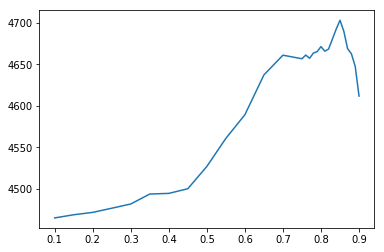

0.85
[  1.20172239  10.97734622   1.37005023 400.02421478]


100%|██████████| 29/29 [02:24<00:00,  4.99s/it]


[   6.20672257   86.28609328 1092.29919059 2955.3301413 ]


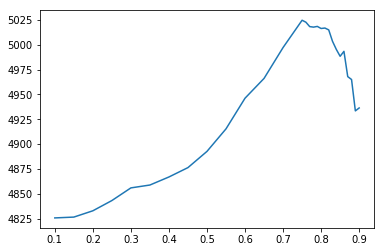

0.75
[  1.04008043   7.19097543   0.83625535 346.44146712]


100%|██████████| 29/29 [02:25<00:00,  5.02s/it]


[  12.09556503  149.63698118 1372.75470593 4282.14439428]


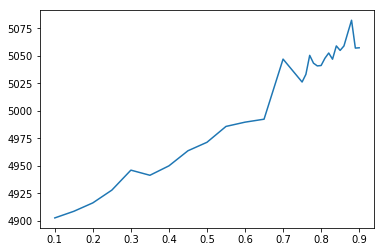

0.88
[  1.34094949  13.59675333   1.82320433 560.11187366]


100%|██████████| 29/29 [02:27<00:00,  5.09s/it]


[  10.74940711  135.78759114 1455.99712843 4482.4551438 ]


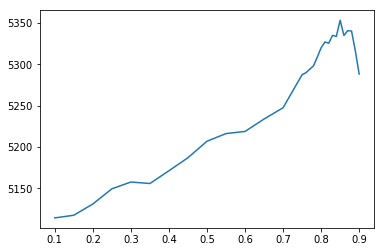

0.85
[  1.28279022  11.6074653    1.59179728 589.64035338]


100%|██████████| 29/29 [03:14<00:00,  6.72s/it]


[   7.65231983  109.79521268 1693.59776507 4481.37390175]


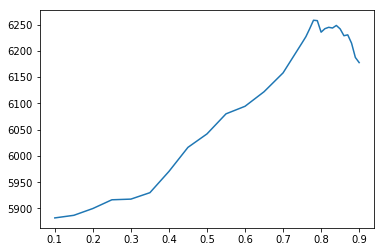

0.78
[  1.12974679   8.57397163   0.96715516 492.67992728]


100%|██████████| 29/29 [02:52<00:00,  5.94s/it]


[   8.1616158   109.19954131 2116.54994454 5646.013204  ]


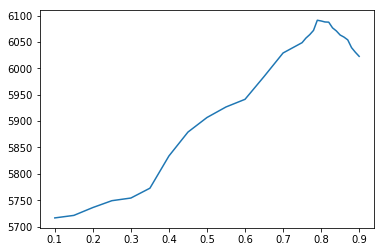

0.79
[  1.16252267   8.61393714   1.04246571 614.2290004 ]


100%|██████████| 29/29 [03:24<00:00,  7.03s/it]


[  12.00787251  148.8239828  2238.90262875 5587.76381924]


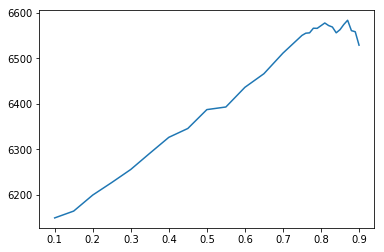

0.87
[  1.34174639  12.92385108   1.47480532 579.94352734]


100%|██████████| 29/29 [03:40<00:00,  7.61s/it]


[  14.0946065   196.01193412 2176.80382577 5359.41080317]


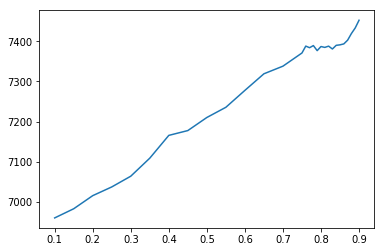

0.9
[  1.43383291  17.15005702   1.62607859 519.66392272]


100%|██████████| 29/29 [03:24<00:00,  7.04s/it]


[   8.40042411  204.08219521 2423.27270724 5492.95945292]


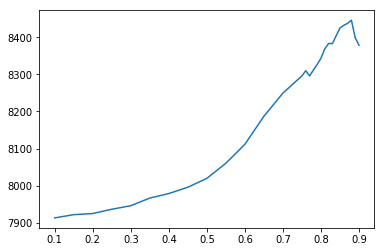

0.88
[  1.11749472  16.18613273   0.91543949 517.7285945 ]


100%|██████████| 29/29 [04:02<00:00,  8.37s/it]


[   7.03524962  238.32849941 2194.50873487 4470.29807259]


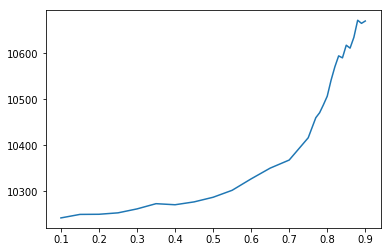

0.88
[  1.01905158  18.41673992   0.71728334 422.31755076]


100%|██████████| 29/29 [05:03<00:00, 10.48s/it]


[   8.12526132  336.96096183 2996.663855   6641.71679012]


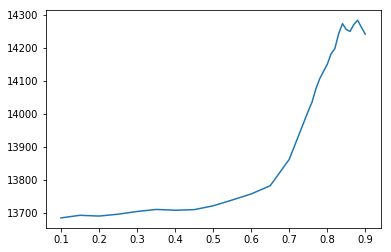

0.88
[  1.10253861  21.30501837   0.74325431 546.8538178 ]


100%|██████████| 29/29 [05:20<00:00, 11.05s/it]


[5.95338418e+00 3.00217673e+02 3.44092934e+03 7.78735312e+03]


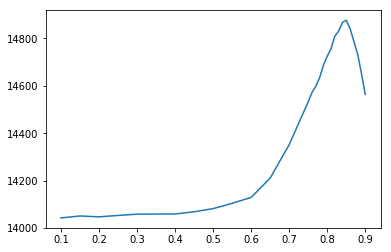

0.85
[9.54298718e-01 1.76116091e+01 5.39842476e-01 6.25704200e+02]


100%|██████████| 29/29 [05:24<00:00, 11.18s/it]


[3.98268755e+00 2.41542621e+02 3.30938559e+03 7.20462847e+03]


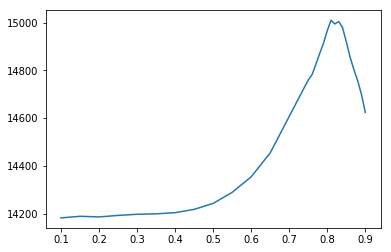

0.81
[7.98370799e-01 1.40457509e+01 3.47356802e-01 5.60886862e+02]


100%|██████████| 29/29 [06:43<00:00, 13.91s/it]


[4.13353481e+00 2.16315034e+02 3.40575183e+03 7.63779318e+03]


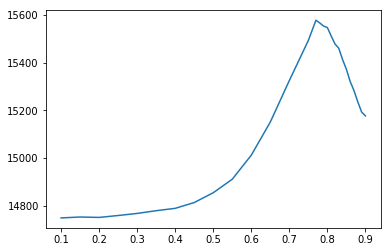

0.77
[8.35297132e-01 1.20284161e+01 3.46356402e-01 5.73388766e+02]


100%|██████████| 29/29 [07:05<00:00, 14.67s/it]


[6.17085601e+00 2.21681080e+02 3.58257172e+03 8.23699031e+03]


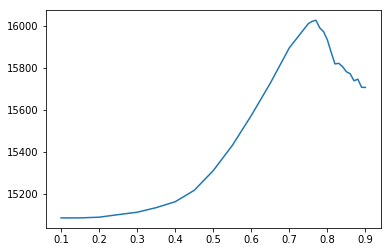

0.77
[1.01873806e+00 1.20537378e+01 5.16206216e-01 6.08841772e+02]


100%|██████████| 29/29 [06:16<00:00, 12.99s/it]


[3.17093017e+00 1.60728560e+02 3.21925124e+03 7.36948456e+03]


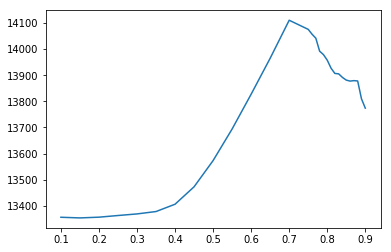

0.7
[7.63438061e-01 8.93605873e+00 2.78248458e-01 5.76158800e+02]


100%|██████████| 29/29 [05:57<00:00, 12.34s/it]


[6.01724069e+00 1.77161892e+02 3.42526143e+03 7.47715942e+03]


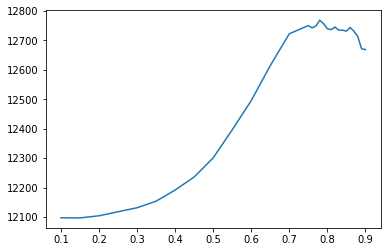

0.78
[9.99955056e-01 1.09781869e+01 5.34964271e-01 5.76086234e+02]


100%|██████████| 29/29 [04:44<00:00,  9.80s/it]


[   4.09295307  142.31994051 2066.99003306 3900.26760026]


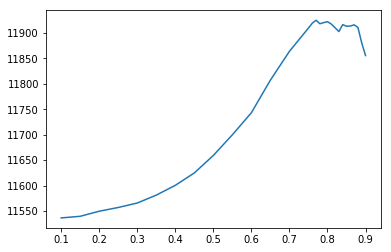

0.77
[  0.83157197  10.09295758   0.34908887 294.15773839]


100%|██████████| 29/29 [04:10<00:00,  8.65s/it]


[   7.80265498  229.72294018 2900.37593621 6875.13144338]


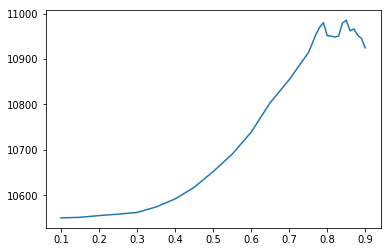

0.85
[  1.09051385  15.35021976   0.77642099 599.48156698]


100%|██████████| 29/29 [04:08<00:00,  8.56s/it]


[   7.41897284  184.69058461 2525.61824713 5799.8406984 ]


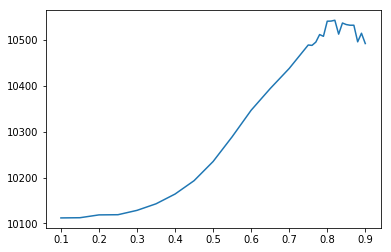

0.82
[  1.08621998  12.49813961   0.72341854 488.55467415]


100%|██████████| 29/29 [04:36<00:00,  9.54s/it]


[   7.0827517   186.55186228 3018.46491782 6913.67364944]


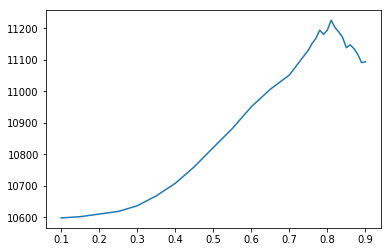

0.81
[  1.06795699  12.18955      0.65273217 541.53707631]


100%|██████████| 29/29 [03:49<00:00,  7.92s/it]


[   5.44668777  141.71669404 2012.9173944  4443.72122381]


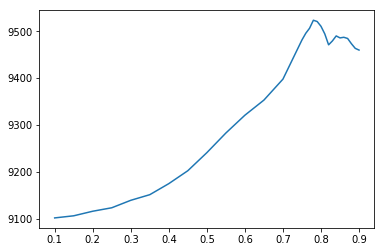

0.78
[  0.95197464  10.05834338   0.53591581 380.91744656]


100%|██████████| 29/29 [04:01<00:00,  8.33s/it]


[9.37113861e+00 1.87686743e+02 3.91028238e+03 1.08811736e+04]


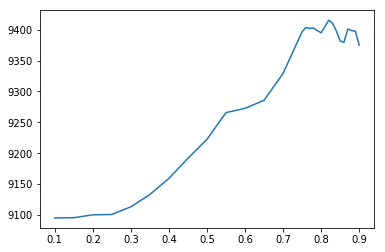

0.82
[1.21506656e+00 1.22444788e+01 1.03105446e+00 1.03278000e+03]


100%|██████████| 29/29 [04:12<00:00,  8.69s/it]


[   9.23750726  153.87529518 3405.85313214 9086.59894501]


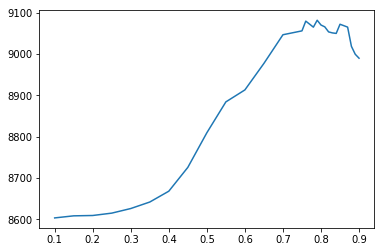

0.79
[  1.23121236  10.26105665   0.98170267 817.83316585]


In [19]:
for k in range(24):
    ph_data = ph.HawkesProcess(big_timestamps[k])
    ph_data.set_kernel_shape()
    ph_data.mle_delta(params, delta_grid = dg_bis, graphic_option = True)
    print(ph_data.deltahat)
    ph_data.variance_asympt()
    print(np.sqrt(np.diagonal(np.linalg.inv(ph_data.fischer_mat)))*1.96/np.sqrt(30))

In [ ]:
ph_data.mle_delta(params, delta_grid = dg_bis, graphic_option = True)